In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
playstore = pd.read_csv(r"C:\Users\Nicolas\Downloads\Movie dataset\googleplaystore.csv")
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
playstore.Reviews = pd.to_numeric(playstore.Reviews,errors='coerce')

In [4]:
playstore['Reviews'] = playstore['Reviews'].loc[playstore['Reviews']>100]

In [5]:
playstore.dropna(subset=['Size','Reviews'],inplace=True)

In [6]:
def definirTamanio(x):
    acum = ''
    numero = None
    for letra in x:
        if letra=='M':
            numero = float(acum)
        elif letra=='k':
            numero = float(acum)/1024
        else:
            acum+=letra
    return numero

playstore['Size'] = playstore['Size'].map(definirTamanio)

In [7]:
playstore['Ratings categoricos'] = pd.cut(playstore.Rating,bins=[1,2,3,4,5],labels=['Entre ★ y ★★','Entre ★★ y ★★★','Entre ★★★ y ★★★★','Entre ★★★★ y ★★★★★']).dropna()

In [8]:
playstore['Type'] = playstore['Type'].map(lambda x:'Paga' if (x=='Paid') else 'Gratis')

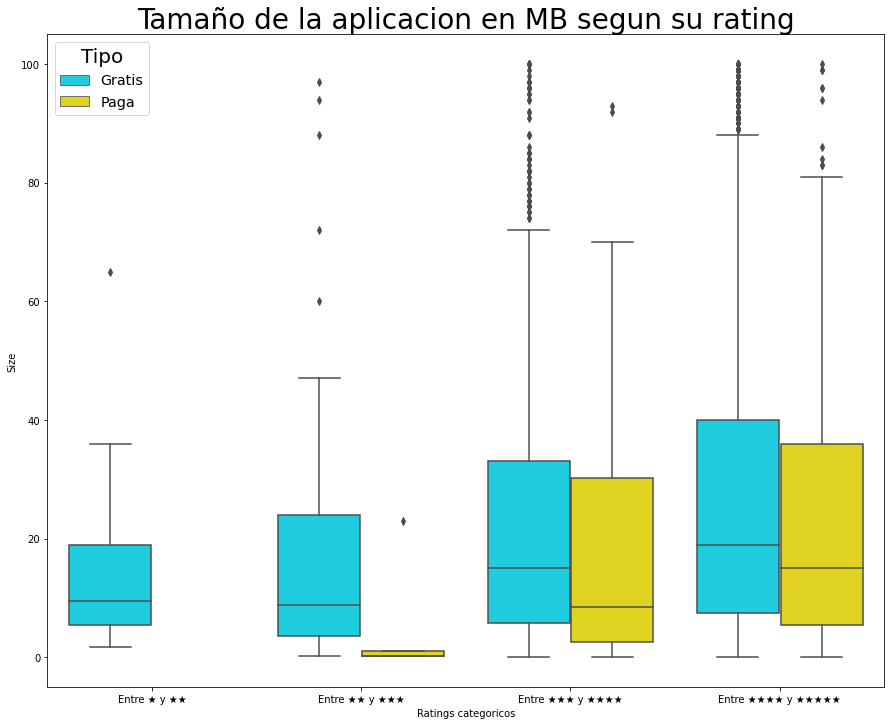

In [9]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,12))
plt.title('Tamaño de la aplicacion en MB segun su rating',fontsize=28)
ax = sns.boxplot(y=playstore['Size'],x=playstore['Ratings categoricos'],hue=playstore['Type'],palette={'Gratis':'#00E7FF','Paga':'#FFED00'})
plt.legend(title='Tipo',fontsize='x-large', title_fontsize='20',loc='upper left')


In [10]:
playstore = pd.read_csv(r"C:\Users\Nicolas\Downloads\Movie dataset\googleplaystore.csv")
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [11]:
def installs(x):
    acum=''
    number=None
    for letra in x:
        if letra==',':
            acum+=''
        elif letra=='+':
            number=int(acum)
        else:
            acum+=letra
    return number

playstore['Installs'] = playstore['Installs'].map(installs)

In [12]:
playstore.Reviews = pd.to_numeric(playstore.Reviews,errors='coerce')

In [13]:
playstore.dropna(subset=['Reviews','Installs'],inplace=True)

In [14]:
playstore['Proporcion de reviews despues de instalar']=playstore['Reviews']/playstore['Installs']

In [15]:
playstore['Ratings categoricos'] = pd.cut(playstore.Rating,bins=[1,2,3,4,5],labels=['Entre ★ y ★★','Entre ★★ y ★★★','Entre ★★★ y ★★★★','Entre ★★★★ y ★★★★★']).dropna()

In [16]:
playstore['Type'] = playstore['Type'].map(lambda x:'Paga' if (x=='Paid') else 'Gratis')

In [17]:
playstore.groupby(['Ratings categoricos','Type']).agg({'Proporcion de reviews despues de instalar':'mean'}).reset_index()

,Ratings categoricos,Type,Proporcion de reviews despues de instalar
0,Entre ★ y ★★,Gratis,0.030008
1,Entre ★ y ★★,Paga,0.164333
2,Entre ★★ y ★★★,Gratis,0.015067
3,Entre ★★ y ★★★,Paga,0.044408
4,Entre ★★★ y ★★★★,Gratis,0.017180
5,Entre ★★★ y ★★★★,Paga,0.066578
6,Entre ★★★★ y ★★★★★,Gratis,0.037794
7,Entre ★★★★ y ★★★★★,Paga,0.122463


Text(0.5, 0, 'Ratings')

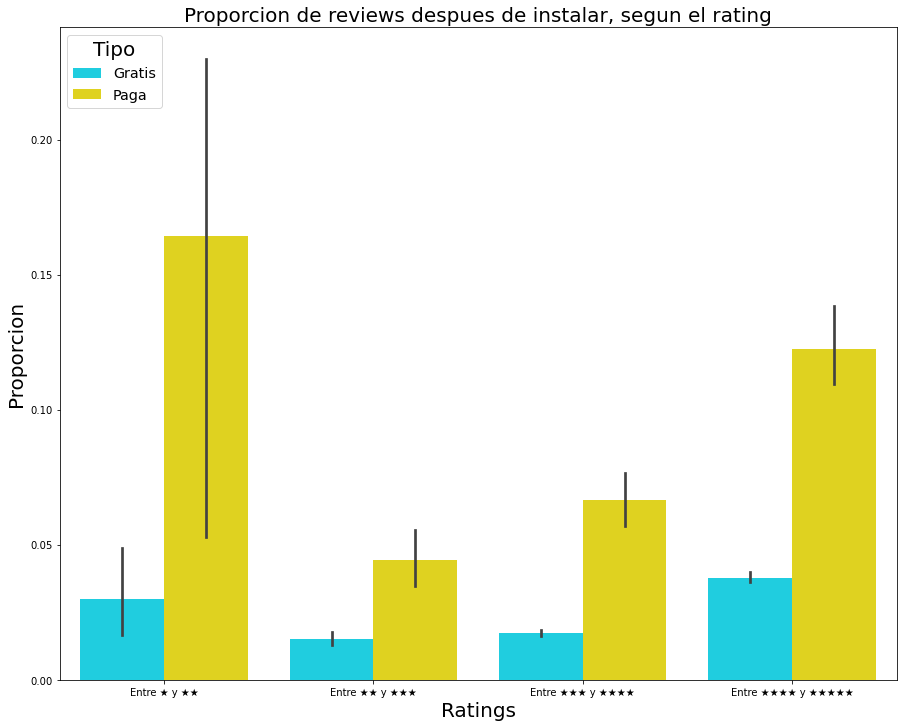

In [18]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,12))
ax = sns.barplot(x=playstore['Ratings categoricos'],y=playstore['Proporcion de reviews despues de instalar'],hue=playstore['Type'],
            palette={'Gratis':'#00E7FF','Paga':'#FFED00'})
plt.title('Proporcion de reviews despues de instalar, segun el rating',fontsize=20)
plt.legend(title='Tipo',fontsize='x-large', title_fontsize='20',loc='upper left')
ax.set_ylabel("Proporcion",fontsize=20)
ax.set_xlabel("Ratings",fontsize=20)